<a href="https://colab.research.google.com/github/hyuntae-yun/blog-ds/blob/master/n212a_multiple_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 2 / SPRINT 1 / NOTE 2*

# 📝 Assignment
---

# 다중선형회귀(Multiple Linear Regression)

이번 과제에서도 n211 과제 에서 다루었던 housing price dataset을 가지고 배운 내용을 연습해 보겠습니다.
다음 링크에서 다운로드 받아 사용해 주세요. [House Sales in King County, USA](https://www.kaggle.com/harlfoxem/housesalesprediction)

### 1) 데이터는 May 2014 ~ May 2015 의 2년치 데이터입니다. 2015-01-01 부터 큰 날짜의 데이터는 테스트, 그 이외의 데이터는 훈련 데이터셋으로 나누어 주세요

In [2]:
### 이곳에서 과제를 진행해 주세요 ###
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nyumnyum","key":"0c4f3e750969e478d08c25c8ada016ac"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d harlfoxem/housesalesprediction
!unzip housesalesprediction.zip

  0% 0.00/780k [00:00<?, ?B/s]
100% 780k/780k [00:00<00:00, 53.3MB/s]
Archive:  housesalesprediction.zip
  inflating: kc_house_data.csv       


In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np
df=pd.read_csv("kc_house_data.csv")
df=df.astype({'date': 'datetime64[ns]'})
df['total_room']=df['bedrooms']+df['bathrooms']
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,total_room
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,4.00
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,5.25
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,3.00
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,7.00
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,5.00


In [70]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'total_room'],
      dtype='object')

In [71]:
dlim=datetime.datetime(2015,1,1)
cond= df['date']>=dlim
cond1= df['date']<dlim
X_test=df[cond]
X_train=df[cond1]
Y_test=X_test['price'].copy()
X_test.drop(['price'],axis=1,inplace=True)
Y_train=X_train['price'].copy()
X_train.drop(['price'],axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4169: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### 2) 두가지 이상 특성을 선택하여 특성공학(feature engineering)을 진행합니다. (kaggle notebook을 참고하여 중요한 특성을 고르는 것이 힌트입니다.)

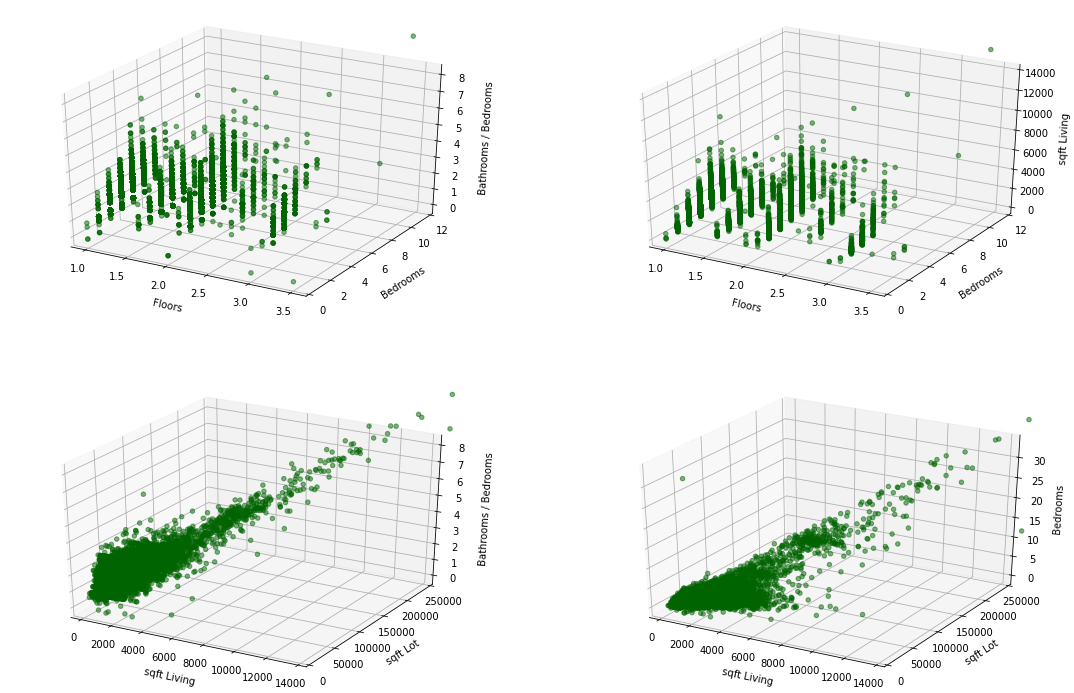

In [72]:
### 이곳에서 과제를 진행해 주세요 ###
fig=plt.figure(figsize=(19,12.5))
ax=fig.add_subplot(2,2,1, projection="3d")
ax.scatter(df['floors'],df['bedrooms'],df['bathrooms'],c="darkgreen",alpha=.5)
ax.set(xlabel='\nFloors',ylabel='\nBedrooms',zlabel='\nBathrooms / Bedrooms')
ax.set(ylim=[0,12])

ax=fig.add_subplot(2,2,2, projection="3d")
ax.scatter(df['floors'],df['bedrooms'],df['sqft_living'],c="darkgreen",alpha=.5)
ax.set(xlabel='\nFloors',ylabel='\nBedrooms',zlabel='\nsqft Living')
ax.set(ylim=[0,12])

ax=fig.add_subplot(2,2,3, projection="3d")
ax.scatter(df['sqft_living'],df['sqft_lot'],df['bathrooms'],c="darkgreen",alpha=.5)
ax.set(xlabel='\n sqft Living',ylabel='\nsqft Lot',zlabel='\nBathrooms / Bedrooms')
ax.set(ylim=[0,250000])

ax=fig.add_subplot(2,2,4, projection="3d")
ax.scatter(df['sqft_living'],df['sqft_lot'],df['bedrooms'],c="darkgreen",alpha=.5)
ax.set(xlabel='\n sqft Living',ylabel='\nsqft Lot',zlabel='Bedrooms')
ax.set(ylim=[0,250000]);

In [8]:
import plotly.express as px
fig =px.scatter_3d(df,x='sqft_living',y='sqft_lot',z='bathrooms')
fig.show()

In [9]:
import plotly.express as px
fig =px.scatter_3d(df,x='sqft_living',y='sqft_lot',z='bedrooms')
fig.show()

### 3) 다중선형회귀 모델을 만들어 보세요

In [58]:
### 이곳에서 과제를 진행해 주세요 ###
from sklearn.linear_model import LinearRegression
model=LinearRegression()
features=['sqft_living','sqft_lot','bathrooms']
model.fit(X_train[features],Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 4) 모델의 회귀계수(coefficients)와 절편(intercept)을 확인해 보세요.

In [59]:
### 이곳에서 과제를 진행해 주세요 ###
print(model.coef_)
print(model.intercept_)

[ 2.90877889e+02 -4.39762145e-01 -7.67544462e+03]
-48258.23186890711


### 5) MSE, RMSE, MAE, $R^2$ 를 훈련/테스트 데이터에 대해 확인해 보세요

MSE(Mean squre error): Mean squre error = MSE=$\frac{1}{n}\sum^{n}_{i=1}(\hat{Y}_i-Y_i)^2$

오차의 제곱에 대한 평균을 취한 값

RMSE(Root mean squared Error) :$\sqrt{\frac{1}{n}\sum^{n}_{i=1}(\hat{Y}_i-Y_i)^2}$

MAE(Mean Absolute Error): $\frac{1}{n}\sum^{n}_{i=1}|\hat{Y}_i-Y_i|$


SSR: 잔차의 제곱합 (residual sum of squares)

SSE: 추정 y의 편차제곱 합 (explained sum of squares)

SST: 총 변동(Total sum of squares)

$SST=SSR+SSE$

$R^2$ = $1-\frac{SSE}{SST}$=$\frac{SSR}{SST}$



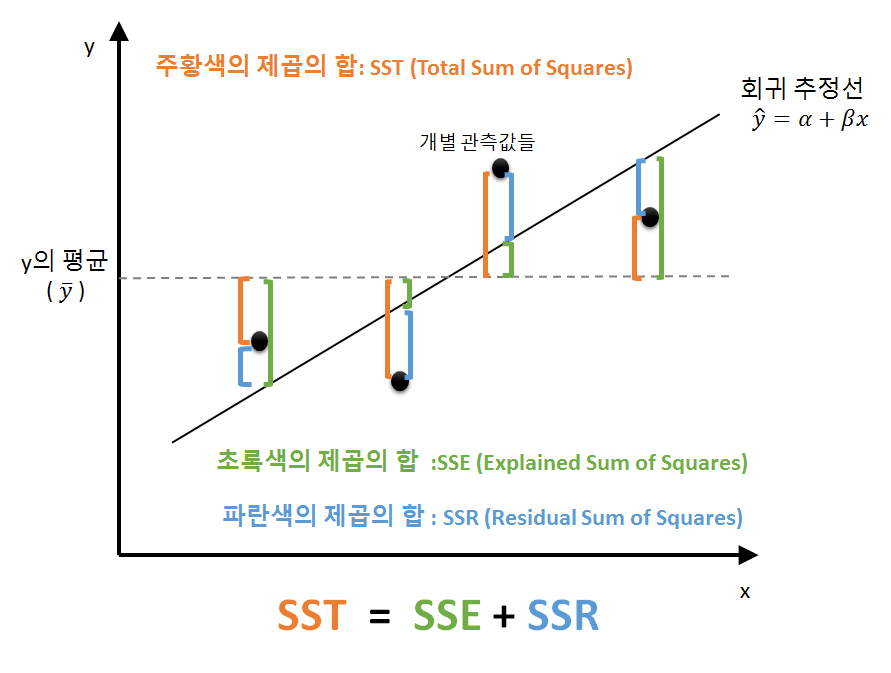

In [60]:
### 이곳에서 과제를 진행해 주세요 ###
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
model=LinearRegression()
features=['sqft_living','sqft_lot','bathrooms']
print("Train ")
model.fit(X_train[features],Y_train)
y_pred=model.predict(X_train[features])
mae = mean_absolute_error(Y_train,y_pred)
print(f'train mae: {mae:.2f}')
mse=mean_squared_error(Y_train,y_pred)
print(f'train mse: {mse:.2f}')
rmse=np.sqrt(mse)
print(f'train rmse: {rmse:.2f}')
r2=r2_score(Y_train,y_pred)
print(f'train r^2: {r2:.2f}')

#TEST
print("\nTEST")
y_pred=model.predict(X_test[features])
mae = mean_absolute_error(Y_test,y_pred)
print(f'test mae: {mae:.2f}')
mse=mean_squared_error(Y_test,y_pred)
print(f'test mse: {mse:.2f}')
rmse=np.sqrt(mse)
print(f'train rmse: {rmse:.2f}')
r2=r2_score(Y_test,y_pred)
print(f'test r^2: {r2:.2f}')

Train 
train mae: 170627.84
train mse: 66837106222.29
train rmse: 258528.73
train r^2: 0.51

TEST
test mae: 179543.44
test mse: 71296372218.07
train rmse: 267013.81
test r^2: 0.46


In [61]:
features=['sqft_living','sqft_lot','bedrooms']
print("Train ")
model.fit(X_train[features],Y_train)
y_pred=model.predict(X_train[features])
mae = mean_absolute_error(Y_train,y_pred)
print(f'train mae: {mae:.2f}')
mse=mean_squared_error(Y_train,y_pred)
print(f'train mse: {mse:.2f}')
rmse=np.sqrt(mse)
print(f'train rmse: {rmse:.2f}')
r2=r2_score(Y_train,y_pred)
print(f'train r^2: {r2:.2f}')

#TEST
print("\nTEST")
y_pred=model.predict(X_test[features])
mae = mean_absolute_error(Y_test,y_pred)
print(f'test mae: {mae:.2f}')
mse=mean_squared_error(Y_test,y_pred)
print(f'test mse: {mse:.2f}')
rmse=np.sqrt(mse)
print(f'train rmse: {rmse:.2f}')
r2=r2_score(Y_test,y_pred)
print(f'test r^2: {r2:.2f}')

Train 
train mae: 167041.57
train mse: 64802229051.75
train rmse: 254562.82
train r^2: 0.52

TEST
test mae: 176001.21
test mse: 69486593041.86
train rmse: 263603.10
test r^2: 0.47


In [51]:
features=['sqft_living','sqft_lot','floors']
print("Train ")
model.fit(X_train[features],Y_train)
y_pred=model.predict(X_train[features])
mae = mean_absolute_error(Y_train,y_pred)
print(f'train mae: {mae:.2f}')
mse=mean_squared_error(Y_train,y_pred)
print(f'train mse: {mse:.2f}')
rmse=np.sqrt(mse)
print(f'train rmse: {rmse:.2f}')
r2=r2_score(Y_train,y_pred)
print(f'train r^2: {r2:.2f}')

#TEST
print("\nTEST")
y_pred=model.predict(X_test[features])
mae = mean_absolute_error(Y_test,y_pred)
print(f'test mae: {mae:.2f}')
mse=mean_squared_error(Y_test,y_pred)
print(f'test mse: {mse:.2f}')
rmse=np.sqrt(mse)
print(f'train rmse: {rmse:.2f}')
r2=r2_score(Y_test,y_pred)
print(f'test r^2: {r2:.2f}')

Train 
train mae: 170478.81
train mse: 66845123034.35
train rmse: 258544.24
train r^2: 0.51

TEST
test mae: 179454.58
test mse: 71295317652.57
train rmse: 267011.83
test r^2: 0.46


In [85]:
features=['sqft_living','sqft_lot','condition','grade','total_room','long','sqft_basement','lat','view','floors']
print("used Features: %s"%features)
print("Train ")
model.fit(X_train[features],Y_train)
y_pred=model.predict(X_train[features])
mae = mean_absolute_error(Y_train,y_pred)
print(f'train mae: {mae:.2f}')
mse=mean_squared_error(Y_train,y_pred)
print(f'train mse: {mse:.2f}')
rmse=np.sqrt(mse)
print(f'train rmse: {rmse:.2f}')
r2=r2_score(Y_train,y_pred)
print(f'train r^2: {r2:f}')

#TEST
print("\nTEST")
y_pred=model.predict(X_test[features])
mae = mean_absolute_error(Y_test,y_pred)
print(f'test mae: {mae:.2f}')
mse=mean_squared_error(Y_test,y_pred)
print(f'test mse: {mse:.2f}')
rmse=np.sqrt(mse)
print(f'train rmse: {rmse:.2f}')
r2=r2_score(Y_test,y_pred)
print(f'test r^2: {r2:f}')

used Features: ['sqft_living', 'sqft_lot', 'condition', 'grade', 'total_room', 'long', 'sqft_basement', 'lat', 'view', 'floors']
Train 
train mae: 132191.61
train mse: 45904596636.78
train rmse: 214253.58
train r^2: 0.663139

TEST
test mae: 138794.11
test mse: 47695873497.41
train rmse: 218393.85
test r^2: 0.637667


['sqft_living','sqft_lot','condition','grade','total_room','long','sqft_basement','lat','view','floors'] feature로 했을 때가 가장 ;$R^2$ 값이 Train data , Test data 모두 좋았다.

'sqft_living': 실제로 거주하는 면적의 크기이다.단위는 피트제곱($ft^2$)이다.

'sqft_lot': 총 면적

'condition': 집의 상태

'grade': (아마도) 종합평가

'total_room': 전체 방의 갯수(화장실 포함)

'sqft_basement': 지하실 크기

'view': 집에서 보이는 경관의 정도

'floors': 집 층 수

'lat': 위도 

'long': 경도


여기서 total_room= bedrooms+bathrooms

Train 

train mae: 132191.61

train mse: 45904596636.78

train rmse: 214253.58

train $R^2$: 0.663139

TEST

test mae: 138794.11

test mse: 47695873497.41

train rmse: 218393.85

test $R^2$: 0.637667


### 6) 테스트데이터에 관해 가장 잘 나온 MSE 스코어를 코톡에서 서로 공유해 보세요

## 참고자료
* [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)
* ["A Few Useful Things to Know about Machine Learning"](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf)
* [Machine Learning and AI via Brain simulations](https://forum.stanford.edu/events/2011/2011slides/plenary/2011plenaryNg.pdf)
* [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf),  Chapter 3.1, Simple Linear Regression, & Chapter 3.2, Multiple Linear Regression
* [Brandon Foltz, Statistics 101: Simple Linear Regression](https://www.youtube.com/watch?v=ZkjP5RJLQF4)